# Linear Regression

Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [6]:
df=pd.read_csv('IRIS.csv')

In [7]:
df.shape

(150, 5)

In [8]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Scatter Plot

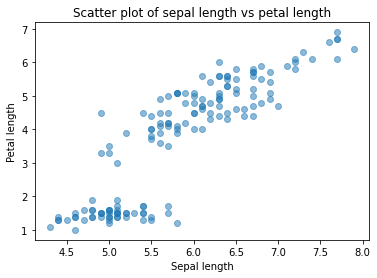

In [16]:
plt.scatter(df['sepal_length'],df['petal_length'],alpha=0.5)
plt.title('Scatter plot of sepal length vs petal length')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

Distribution Plot

Text(0.5, 1.0, 'Distribution Plot for sepal length')

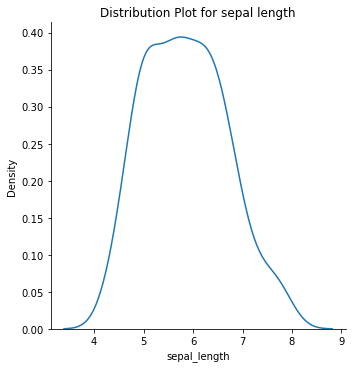

In [17]:
sns.displot(df, x=df['sepal_length'],kind="kde")
plt.title('Distribution Plot for sepal length')

Text(0.5, 1.0, 'Distribution Plot for petal length')

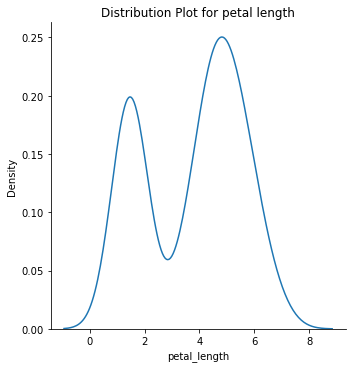

In [18]:
sns.displot(df, x=df['petal_length'],kind="kde")
plt.title('Distribution Plot for petal length')

In [26]:
X = df.iloc[:,:1 ].values
Y = df.iloc[:,2].values

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
X.shape

(150, 1)

In [30]:
Y.shape

(150,)

In [31]:
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [32]:
Y

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

Splitting data into train and test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

Fitting Simple Linear Regression Model to train set

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Parameters in Linear Regression

In [36]:
regressor.coef_

array([1.85562951])

In [37]:
regressor.intercept_

-7.026880111908164

Prediction of Y_test

In [38]:
Y_test_prediction = regressor.predict(X_test)

Prediction of Y_train

In [40]:
Y_train_prediction = regressor.predict(X_train)

In [41]:
Y_test_prediction

array([2.06570448, 1.50901563, 5.03471169, 3.36464513, 2.80795628,
       6.70477825, 7.632593  , 3.92133399, 1.69457858, 1.32345268,
       4.29245989, 3.55020809, 5.59140054, 7.2614671 , 2.43683038,
       1.88014153, 3.92133399, 2.99351923, 4.10689694, 2.25126743,
       5.03471169, 5.22027464, 2.43683038, 6.33365235, 2.43683038,
       4.47802284, 6.1480894 , 2.62239333, 3.17908218, 2.25126743,
       3.55020809, 2.25126743, 5.22027464, 5.40583759, 3.17908218,
       4.29245989, 5.40583759, 2.43683038])

In [42]:
Y_train_prediction

array([2.25126743, 4.66358579, 1.88014153, 3.73577104, 2.25126743,
       5.59140054, 2.25126743, 5.7769635 , 4.84914874, 2.43683038,
       1.13788972, 3.36464513, 4.10689694, 5.40583759, 4.29245989,
       2.62239333, 3.73577104, 4.66358579, 4.66358579, 3.36464513,
       6.33365235, 1.88014153, 2.06570448, 1.13788972, 4.47802284,
       2.06570448, 1.13788972, 4.66358579, 4.66358579, 7.2614671 ,
       5.03471169, 7.07590415, 4.10689694, 5.59140054, 2.06570448,
       3.17908218, 1.88014153, 7.2614671 , 4.29245989, 3.73577104,
       5.40583759, 5.40583759, 5.40583759, 2.99351923, 7.2614671 ,
       4.66358579, 6.33365235, 3.55020809, 5.96252645, 1.50901563,
       4.10689694, 2.25126743, 3.73577104, 4.10689694, 3.55020809,
       3.36464513, 4.29245989, 2.43683038, 4.66358579, 3.73577104,
       0.95232677, 3.36464513, 1.50901563, 2.25126743, 6.5192153 ,
       3.55020809, 5.40583759, 2.43683038, 2.43683038, 3.17908218,
       2.62239333, 4.84914874, 3.55020809, 5.03471169, 3.17908

In [43]:
Y_test

array([1.5, 1.4, 5.8, 4.2, 1.5, 6.1, 6.4, 4.2, 1.3, 1.3, 5.6, 4.2, 5.9,
       6.7, 1.4, 1.6, 4.8, 1.5, 4. , 3.5, 5.5, 4.6, 1.5, 6.1, 1.9, 4.3,
       5.9, 3.9, 1.3, 1.6, 4.5, 1.5, 4.4, 5.7, 1.4, 4.7, 4.4, 1.5])

Visualization of training set

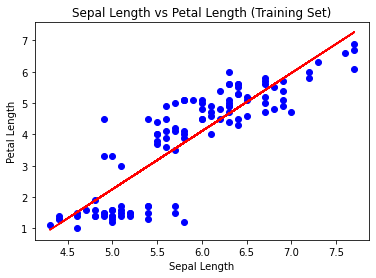

In [44]:
plt.scatter(X_train, Y_train,color ='blue')
plt.plot(X_train,Y_train_prediction,color ='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length (Training Set)')
plt.show()

Visualization of test set

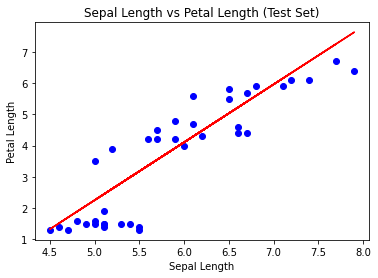

In [45]:
plt.scatter(X_test, Y_test,color ='blue')
plt.plot(X_test,Y_test_prediction,color ='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length (Test Set)')
plt.show()

Test performance

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_prediction)

0.7542924866823708

Train performance

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_train_prediction)

0.74269168166622

R2 score for train set

In [50]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_train_prediction)

0.7481004238876338

R2 score for test set

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_prediction)

0.7839732265290991